# Un peu de vacabulaire...

- **SGBDR** (Système de Gestion de Base de Données Relationnelles) : logiciel permettant de créer et administrer des bases de données. Tu peux créer dedans autant de bases de données que tu le souhaites. Il existe de nombreux SGBDR, comme MySQL, PostgreSQL, Oracle, etc.

- **Base de données** : conteneur permettant de stocker des informations diverses, de manière structurée, dans des tables.

- **Table** : sous-unité d’une base de données, contenant des informations de même type, que l'on peut regrouper par des propriétés communes, ce qui permet de les structurer de manière cohérente. Ainsi, on peut regrouper les informations des "sorciers" (wizard), "écoles" (school) et des "maisons" (house) entre elles. Tu verras par la suite qu’il est également possible de relier les tables entre elles, pour créer des relations.

- **Champ** : propriété qui caractérise chaque donnée d’une table. Par exemple, une table wizard pourra contenir des champs firstname, lastname, birth_place... Les champs possèdent des caractéristiques précises (type, longueur, nullable, unicité, etc.).

- **Clé primaire** : C’est un identifiant unique qui permet d’identifier rapidement un enregistrement. La clé primaire est constituée par un (parfois plusieurs) champ(s).

- **Tuple** : valeurs d’une seule ligne d’une table. Par exemple, pour la table wizard, tu pourras avoir les tuples suivants :
“Harry”, “Potter”, “Londres”
“Hermione”, “Granger”, “Londres”

# Introduction

In [ ]:
CREATE DATABASE wild; ## crée un data base
USE wild;             ## utiliser la database


In [ ]:
### Création d'une table

CREATE TABLE wizard (
  id INT NOT NULL AUTO_INCREMENT,
  firstname VARCHAR(100) NOT NULL,
  lastname VARCHAR(100) NOT NULL,
  birthday DATE DEFAULT NULL,
  birth_place VARCHAR(255) DEFAULT NULL,
  biography TEXT DEFAULT NULL,
  PRIMARY KEY (id)
);

- Commande principale :

**SHOW** : la commande SHOW permet d’afficher de nombreux types d’informations sur ce que contient ton SGBDR.

Par exemple :

SHOW DATABASES; permet de lister toutes les BDD

SHOW TABLES; permet de lister toutes les tables de la base de données actuellement sélectionnée.

**DESCRIBE** : permet d’afficher des informations détaillées sur les colonnes d’une table, par ex : DESCRIBE wizard;

**ALTER** : il existe de nombreuses commandes commençant par ALTER, qui te permettent de modifier la structure d’une BDD/Table existante.



- Select

In [ ]:
SELECT <champs> FROM <table>; # pour selectionner une colone ou plrs d'une table
SELECT * FROM <table>; # pour selectioner toute une table
SELECT DISCTINCT <champs> FROM <table> # pour selectionner sans doubons

# WHERE

In [ ]:
SELECT nom_colonnes FROM nom_table WHERE condition


**Opérateur	Description**

=	Égale

<>	Pas égale

!=	Pas égale

'>	Supérieur à

<	Inférieur à

'>=	Supérieur ou égale à

<=	Inférieur ou égale à

IN	Liste de plusieurs valeurs possibles

BETWEEN	Valeur comprise dans un intervalle donnée (utile pour les nombres ou dates)

LIKE	Recherche en spécifiant le début, milieu ou fin d'un mot.

IS NULL	Valeur est nulle

IS NOT NULL	Valeur n'est pas nulle

In [ ]:
# Exemple :
SELECT firstname, birthday
FROM wizard
WHERE
lastname LIKE 'Weas%' AND
birthday BETWEEN '1970-01-01' AND '2000-01-01';

# ORDER/LIMIT

In [ ]:
# LIMIT

SELECT <champs> FROM <table> LIMIT <nb_results> OFFSET <a partir de>;

In [ ]:
# ORDER BY

SELECT firstname, lastname FROM wizard ORDER BY lastname ASC, birthday DESC;

#ASC ascendant / DESC Descendant

# INSERT/UPDATE/DELETE/TRUNCATE

In [ ]:
#Insert
INSERT INTO table
  (col1, col2, ...)
VALUES
  ('valeur1', 'valeur2', ...);
#exemple
INSERT INTO school
  (name, country, capacity)
VALUES
  ('Hogwarts School of Witchcraft and Wizardry', 'United Kingdom', 400);

In [ ]:
# Update / modification de la table
UPDATE <table>
SET colonne1 = valeur1, colonne2 = valeur2, etc...
WHERE <conditions>;
#exemple
UPDATE school
SET capacity = 450
WHERE id = 1;

In [ ]:
# Delete / Supprimer des données
DELETE FROM <table>
WHERE <conditions>;

#exemple
DELETE FROM school
WHERE id = 3;

In [ ]:
# Vide la table

TRUNCATE school;

# Clé étrangère

In [ ]:
# Ajout clé etrangère
ALTER TABLE wizard
  ADD CONSTRAINT fk_wizard_school
  FOREIGN KEY (school_id)
  REFERENCES school(id);

In [ ]:
# Crée une table avec une clé étrangère
CREATE TABLE wizard (
    id INT PRIMARY KEY AUTO_INCREMENT,
    firstname VARCHAR(100) NOT NULL,
    lastname VARCHAR(100) NOT NULL,
    school_id INT NOT NULL,
    CONSTRAINT fk_wizard_school
        FOREIGN KEY (school_id)
        REFERENCES school(id)
);

# Type de relation

- One To One (1-1) : une relation unique entre deux entités. Par exemple, un Sorcier ne pourra posséder qu’un et un seul Familier, et un Familier n’appartient qu’à un seul et un seul Sorcier.

- One To Many (1-N) : c’est le cas juste au-dessus où un Sorcier s'inscrit dans une seule École et où dans une École peuvent s'inscrire plusieurs Sorciers. Tu peux aussi parler de Many To One si tu le lis dans l'autre sens : c'est la même chose.

- Many To Many (N-N) : une entité peut interagir avec plusieurs éléments d’une autre entité, et vice versa. Par exemple, un Sorcier peut emprunter plusieurs Livres, et un Livre peut être emprunté par plusieurs Sorciers.

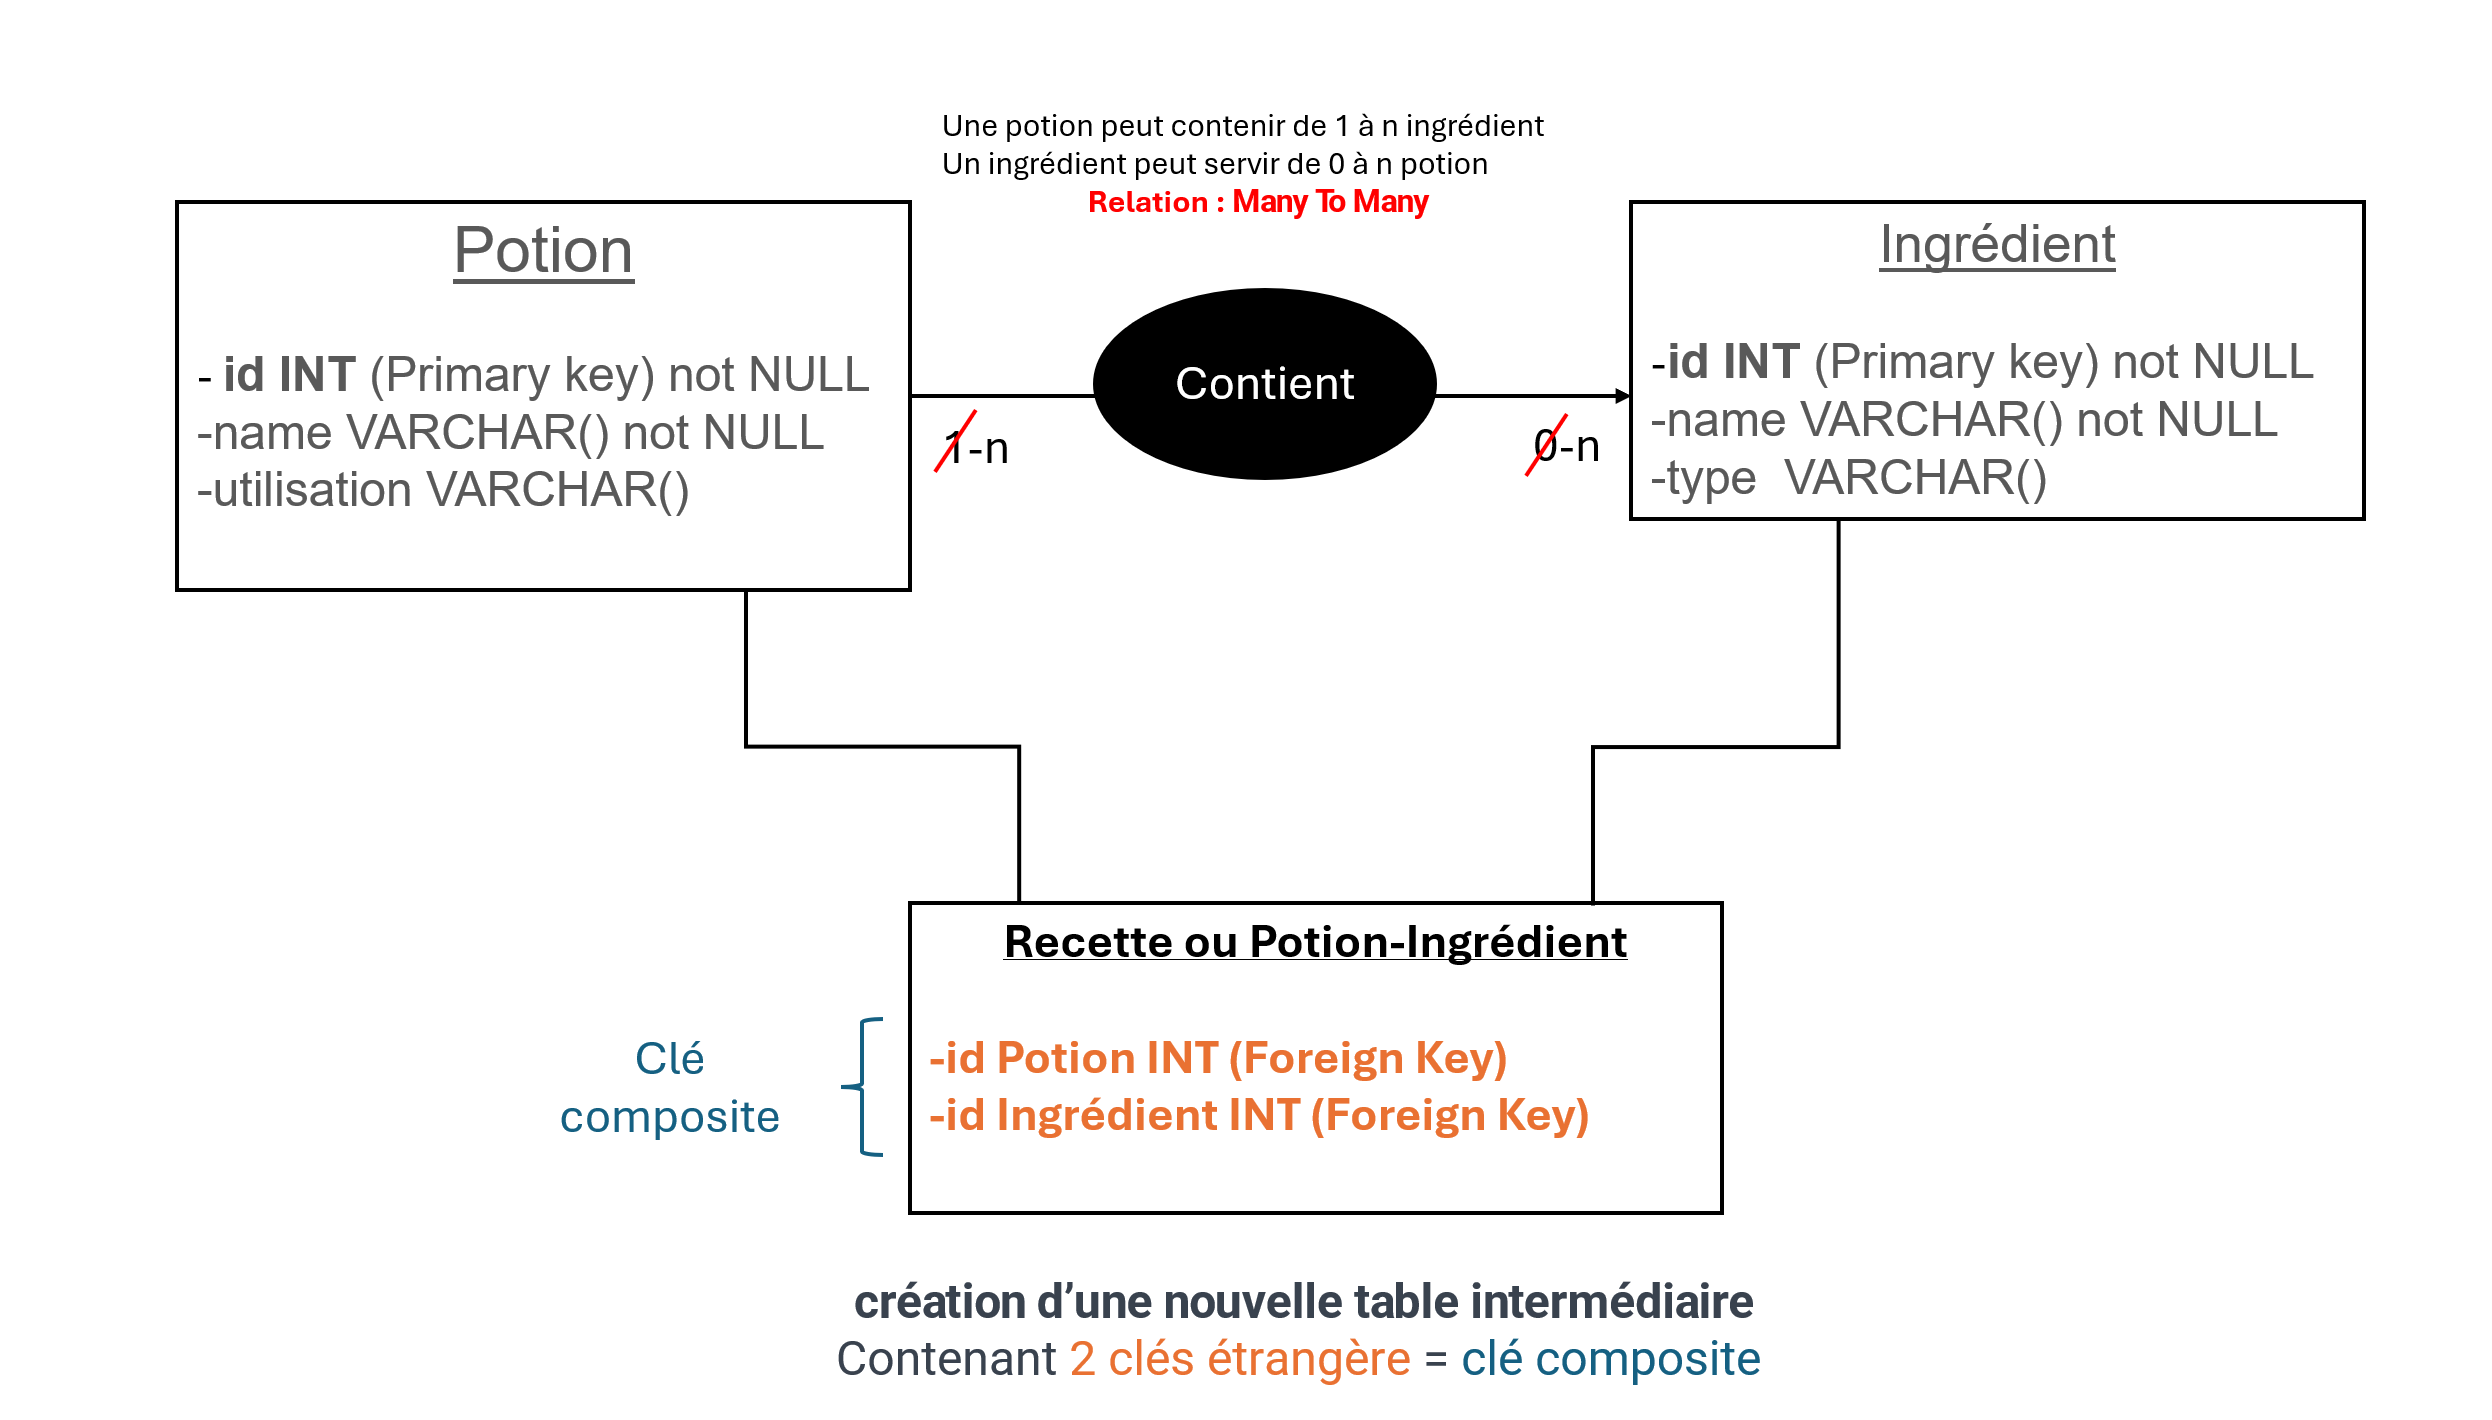

# JOINTURE

In [ ]:
#INNER JOIN
SELECT *
FROM A
INNER JOIN B ON A.key = B.key

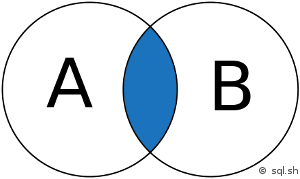

In [ ]:
# LEFT JOIN
SELECT *
FROM A
LEFT JOIN B ON A.key = B.key

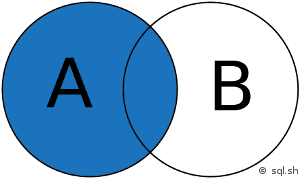

In [ ]:
#RIGTH JOIN
SELECT *
FROM A
RIGHT JOIN B ON A.key = B.key

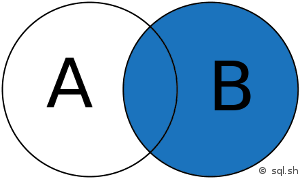

In [ ]:
#FULL JOIN
SELECT *
FROM A
FULL JOIN B ON A.key = B.key
WHERE A.key IS NULL
OR B.key IS NULL

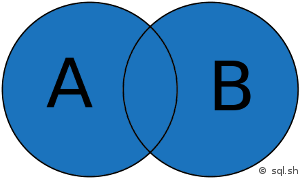

# FONCTION STATISTIQUE

- AVG() pour calculer la moyenne d’un set de valeur. Permet de connaître le prix du panier moyen pour de chaque client
- COUNT() pour compter le nombre de lignes concernées. Permet de savoir combien d’achats a été effectué par chaque client
- MAX() pour récupérer la plus haute valeur. Pratique pour savoir l’achat le plus cher
- MIN() pour récupérer la plus petite valeur. Utile par exemple pour connaître la date du premier achat d’un client
- SUM() pour calculer la somme de plusieurs lignes. Permet par exemple de connaître le total de tous les achats d’un client

# GROUP BY / HAVING

In [ ]:
# GROUP BY
SELECT colonne1, fonction(colonne2)
FROM table
GROUP BY colonne1


In [ ]:
#GROUP BY avec HAVING
SELECT colonne1, SUM(colonne2)
FROM nom_table
GROUP BY colonne1
HAVING fonction(colonne2) operateur valeur

In [ ]:
#exemple
#Si dans une table on souhaite récupérer la liste des clients qui ont commandé plus de 40€,
# toute commandes confondu alors il est possible d’utiliser la requête suivante :

SELECT client, SUM(tarif)
FROM achat
GROUP BY client
HAVING SUM(tarif) > 40

# La clause WITH

La clause WITH en SQL, également connue sous le nom de "Common Table Expression" (CTE), permet de définir une requête temporaire que vous pouvez référencer dans une autre requête. Cela rend le code SQL plus lisible et facilite la gestion des requêtes complexes.

Nous voulons calculer le chiffre d'affaires total pour chaque produit, puis afficher uniquement les produits dont le chiffre d'affaires est supérieur à 5

In [ ]:
WITH ChiffreAffaires AS (
    SELECT
        produit,
        SUM(quantite * prix_unitaire) AS total
    FROM
        Ventes
    GROUP BY
        produit
)
SELECT
    produit,
    total
FROM
    ChiffreAffaires
WHERE
    total > 5.00;

# CREATE VIEW

La commande CREATE VIEW en SQL permet de créer une vue, qui est une sorte de table virtuelle. Une vue est définie par une requête SQL et peut être utilisée pour simplifier des requêtes complexes, masquer des données, ou présenter les données d'une manière spécifique.

In [ ]:
CREATE VIEW nom_de_la_vue AS
SELECT colonne1, colonne2, ...
FROM nom_de_la_table
WHERE condition;

# WINDOWS FUNCTION

Les window functions (ou fonctions de fenêtre) en SQL sont des fonctions qui effectuent des calculs sur un ensemble de lignes liées à la ligne courante, tout en conservant les lignes d'origine dans le résultat. Elles sont très utiles pour les analyses de données complexes, comme le calcul de moyennes mobiles, les totaux cumulés, ou le classement des résultats.

In [ ]:
SELECT
	colonne1,
	colonne2,
	fonction_de_fenetre(colonne) OVER (PARTITION BY colonne_partition ORDER BY colonne_ordre) AS alias
FROM
	table;

**Principaux composants**

- **Fonction de fenêtre** : Ce peut être des fonctions d'agrégation (comme SUM(), AVG(), COUNT()) ou des fonctions analytiques (comme ROW_NUMBER(), RANK(), DENSE_RANK()).
- **OVER** : Spécifie que la fonction est une fonction de fenêtre.
- **PARTITION BY** : (facultatif) Divise les résultats en groupes pour appliquer la fonction. Si omis, la fonction s'applique à l'ensemble de la table.
- **ORDER BY** : (facultatif) Définit l'ordre des lignes dans chaque partition.

## Fonctions d’agrégations

**SUM(): Calculer un total cumulé**

Imaginons que vous ayez une table ventes avec les colonnes date, produit et montant. Vous souhaitez calculer le total cumulé des ventes par produit :

In [ ]:
SELECT
	date,
	produit,
	montant,
	SUM(montant) OVER (PARTITION BY produit ORDER BY date) AS total_cumule
FROM
    Ventes;

In [ ]:
date	produit	montant	total_cumule
2024-01-01	A	100	100
2024-01-02	A	150	250
2024-01-04	A	50	300
2024-01-03	B	200	200
2024-01-05	B	300	500

**AVG(): Moyenne mobile**

Pour calculer une moyenne mobile sur les ventes :

In [ ]:
SELECT
	date,
	produit,
	montant,
	AVG(montant) OVER (ORDER BY date ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS moyenne_mobile
FROM
	ventes;

  #ROWS BETWEEN 2 PRECEDING AND CURRENT ROW : Cette clause précise la "fenêtre" sur laquelle la moyenne est calculée.
  #Elle définit une plage de lignes, en fonction de la ligne actuelle.
  #- 2 PRECEDING : Signifie que l'analyse inclut les deux lignes précédentes.
  #- CURRENT ROW : Inclut également la ligne actuelle dans le calcul.

In [ ]:
date	produit	montant	moyenne_mobile
2024-01-01	A	100	100.00
2024-01-02	B	150	125.00
2024-01-03	A	200	150.00
2024-01-04	B	50	133.33
2024-01-05	A	300	183.33

**MIN()**

Pour calculer le prix min par produit

In [ ]:
SELECT
    date,
    produit,
    montant,
    MIN(montant) OVER (PARTITION BY produit ORDER BY date) AS montant_min_cumulatif
FROM
    ventes;

In [ ]:
date	      produit	montant	montant_min_cumulatif
2024-01-01	Produit A	100	100
2024-01-02	Produit A	150	100
2024-01-03	Produit A	130	100
2024-01-01	Produit B	200	200
2024-01-02	Produit B	180	180
2024-01-03	Produit B	220	180

**MAX()**

Prix maximum par produit

In [ ]:
SELECT
	produit,
	date,
	montant,
	MAX(montant) OVER (PARTITION BY produit) AS montant_max
FROM
	ventes;

In [ ]:
produit	date	montant	montant_max
A	   2024-01-01	50	150
A  	 2024-01-02	150	150
A	   2024-01-03	100	150
B	   2024-01-01	200	300
B	   2024-01-02	300	300

**COUNT()**

In [ ]:
SELECT
	date,
	produit,
	montant,
	COUNT(*) OVER (PARTITION BY produit ORDER BY date) AS ventes_cumulatives
FROM
	ventes;


In [ ]:
date	      produit	 montant	ventes_cumulatives
2024-01-01	Produit A	100    	1
2024-01-02	Produit A	150	    2
2024-01-03	Produit A	130	    3
2024-01-01	Produit B	200	    1
2024-01-02	Produit B	180	    2
2024-01-03	Produit B	220	    3

## Fonctions de classements

**ROW_NUMBER():**

Voici un exemple d'utilisation de la fonction de fenêtre ROW_NUMBER() pour attribuer un numéro de ligne unique à chaque vente d'un produit dans l'ordre chronologique.

In [ ]:
SELECT
	date,
	produit,
	montant,
	ROW_NUMBER() OVER (PARTITION BY produit ORDER BY date) AS numero_ligne
FROM
	ventes;

In [ ]:
date	produit	montant	numero_ligne
2024-01-01	Produit A	100	1
2024-01-02	Produit A	150	2
2024-01-03	Produit A	130	3
2024-01-01	Produit B	200	1
2024-01-02	Produit B	180	2
2024-01-03	Produit B	220	3

**RANK():**

Pour attribuer un rang aux produits en fonction de leurs ventes

In [ ]:
SELECT
    produit,
    montant,
    RANK() OVER (ORDER BY montant DESC) AS rang
FROM
    ventes;

In [ ]:
produit	montant	rang
A	500	1
C	500	1
E	300	3
B	200	4
D	100	5

**DENSE_RANK():**

La fonction de fenêtre DENSE_RANK() attribue un rang à chaque ligne dans une partition, mais contrairement à ROW_NUMBER(), elle attribue le même rang à des valeurs égales et n'a pas de "trou" dans le classement. Voyons comment l'utiliser.

In [ ]:
SELECT
	date,
	produit,
	montant,
	DENSE_RANK() OVER (PARTITION BY produit ORDER BY montant DESC) AS rang_dense
FROM
	ventes;

In [ ]:
date	produit	montant	rang_dense
2024-01-02	Produit A	150	1
2024-01-03	Produit A	150	1
2024-01-01	Produit A	100	2
2024-01-03	Produit B	220	1
2024-01-01	Produit B	200	2
2024-01-02	Produit B	180	3

**PERCENT_RANK():**

La fonction de fenêtre PERCENT_RANK() calcule le rang relatif d'une ligne par rapport à d'autres lignes dans une partition, exprimé en pourcentage. Contrairement à d'autres fonctions de classement, elle ne retourne pas de valeurs entières, mais des valeurs entre 0 et 1. La première ligne obtient toujours 0, et les autres lignes reçoivent des pourcentages en fonction de leur position dans le classement.

In [ ]:
SELECT
	date,
	produit,
	montant,
	PERCENT_RANK() OVER (PARTITION BY produit ORDER BY montant DESC) AS percent_rank
FROM
	ventes;

In [ ]:
date	produit	montant	percent_rank
2024-01-02	Produit A	150	0.000
2024-01-03	Produit A	130	0.500
2024-01-01	Produit A	100	1.000
2024-01-03	Produit B	220	0.000
2024-01-01	Produit B	200	0.500
2024-01-02	Produit B	180	1.000

**NTILE():**

La fonction de fenêtre NTILE() permet de diviser les lignes d'un résultat en un nombre égal de groupes (ou "n-tile"), et chaque ligne est assignée à un groupe en fonction de son rang dans la partition. Cela peut être utile pour répartir des données en quantiles, déciles, quartiles, etc.

In [ ]:
SELECT
	date,
	produit,
	montant,
	NTILE(3) OVER (PARTITION BY produit ORDER BY montant DESC) AS groupe
FROM
	ventes;

In [ ]:
date	produit	montant	groupe
2024-01-02	Produit A	150	1
2024-01-03	Produit A	130	2
2024-01-01	Produit A	100	3
2024-01-03	Produit B	220	1
2024-01-01	Produit B	200	2
2024-01-02	Produit B	180	3

## Fonction de valeur

**LAG()**

La fonction LAG() est une des window functions en SQL qui permet d'accéder à une valeur dans une ligne précédente par rapport à la ligne courante dans une partition. Elle est particulièrement utile pour comparer des valeurs entre lignes successives, par exemple, pour calculer des variations, des différences ou des tendances au fil du temps.

In [ ]:
LAG(expression [, offset [, default]])
OVER (PARTITION BY colonne_partition ORDER BY colonne_ordre)

**Principaux composants**

- **expression** : La colonne dont vous voulez obtenir la valeur de la ligne précédente.
- **offset** : (facultatif) Un entier spécifiant combien de lignes avant la ligne courante vous voulez accéder. La valeur par défaut est 1 (c'est-à-dire la ligne immédiatement précédente).
- **default** : (facultatif) Une valeur à retourner si aucune ligne précédente n'est trouvée (par exemple, pour la première ligne de chaque partition). Si omis, la valeur par défaut sera NULL.
- **OVER** : Utilisé pour définir la fenêtre d'analyse, où vous pouvez spécifier la partition et l'ordre des lignes.

In [ ]:
SELECT
	date,
	produit,
	montant,
	LAG(montant) OVER (PARTITION BY produit ORDER BY date) AS montant_precedent,
	montant - LAG(montant) OVER (PARTITION BY produit ORDER BY date) AS différence
FROM
	ventes;

In [ ]:
date	produit	montant	montant_precedent	différence
2024-01-01	Produit A	100	NULL	NULL
2024-01-02	Produit A	150	100	50
2024-01-03	Produit A	130	150	-20
2024-01-01	Produit B	200	NULL	NULL
2024-01-02	Produit B	180	200	-20
2024-01-03	Produit B	220	180	40

**LEAD()**

La fonction de fenêtre LEAD() permet d'accéder aux valeurs des lignes suivantes dans un jeu de résultats sans avoir besoin de faire des jointures supplémentaires. Elle est souvent utilisée pour comparer une ligne avec la suivante.

In [ ]:
SELECT
	date,
	produit,
	montant,
	LEAD(montant) OVER (PARTITION BY produit ORDER BY date) AS montant_suivant
FROM
	ventes;

In [ ]:
date	produit	montant	montant suivant
2024-01-01	Produit A	100	150
2024-01-02	Produit A	150	130
2024-01-03	Produit A	130	NULL
2024-01-01	Produit B	200	180
2024-01-02	Produit B	180	220
2024-01-03	Produit B	220	NULL

**FIRST_VALUE():**

La fonction de fenêtre FIRST_VALUE() permet d'extraire la première valeur d'une partition, selon l'ordre spécifié. C'est utile lorsque vous souhaitez obtenir la première valeur d'une colonne pour chaque groupe de données, sans avoir à utiliser des sous-requêtes ou des jointures supplémentaires.

In [ ]:
SELECT
	date,
	produit,
	montant,
	FIRST_VALUE(montant) OVER (PARTITION BY produit ORDER BY date) AS premier_montant
FROM
	ventes;

In [ ]:
date	produit	montant	premier_montant
2024-01-01	Produit A	100	100
2024-01-02	Produit A	150	100
2024-01-03	Produit A	130	100
2024-01-01	Produit B	200	200
2024-01-02	Produit B	180	200
2024-01-03	Produit B	220	200

**LAST_VALUE():**

La fonction de fenêtre LAST_VALUE() permet d'extraire la dernière valeur d'une partition selon l'ordre spécifié. Cela peut être utile lorsque vous souhaitez obtenir la dernière valeur d'une colonne pour chaque groupe de données.

In [ ]:
SELECT
	date,
	produit,
	montant,
	LAST_VALUE(montant) OVER (PARTITION BY produit ORDER BY date ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS dernier_montant
FROM
	ventes;

In [ ]:
date	produit	montant	dernier_montant
2024-01-01	Produit A	100	130
2024-01-02	Produit A	150	130
2024-01-03	Produit A	130	130
2024-01-01	Produit B	200	220
2024-01-02	Produit B	180	220
2024-01-03	Produit B	220	220

**NTH_VALUE():**

La fonction de fenêtre NTH_VALUE() permet d'extraire la valeur à la n-ième position d'une partition, selon l'ordre spécifié. Cela peut être utile lorsque vous souhaitez obtenir une valeur spécifique à une position donnée dans un groupe de données.

In [ ]:
SELECT
	date,
	produit,
	montant,
	NTH_VALUE(montant, 2) OVER (PARTITION BY produit ORDER BY date ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS montant_deuxieme
FROM
	ventes;

In [ ]:
date	produit	montant	montant_deuxieme
2024-01-01	Produit A	100	150
2024-01-02	Produit A	150	150
2024-01-03	Produit A	130	150
2024-01-01	Produit B	200	180
2024-01-02	Produit B	180	180
2024-01-03	Produit B	220	180

# BUCKETS

En SQL, vous pouvez utiliser la clause CASE WHEN pour créer des buckets dynamiquement lors de l'exécution d'une requête. Cela vous permet de regrouper des données en fonction de conditions spécifiques et de les classer dans des catégories (ou buckets). Voici comment procéder.

**exemple:**
Imaginons que vous ayez une table ventes avec les colonnes produit et montant. Vous souhaitez classer les ventes en différentes catégories basées sur le montant :

- **Faible** : montant < 100
- **Moyenne** : 100 ≤ montant < 500
- **Élevée** : montant ≥ 500

In [ ]:
SELECT
	produit,
	montant,
	CASE
		WHEN montant < 100 THEN 'Faible'
		WHEN montant >= 100 AND montant < 500 THEN 'Moyenne'
		WHEN montant >= 500 THEN 'Élevée'
		ELSE 'Inconnu'  -- Optionnel pour gérer les valeurs inattendues
	END AS categorie
FROM
	ventes;


In [ ]:
produit	montant	catégorie
A	50	Faible
B	150	Moyenne
C	600	Élevée
D	300	Moyenne
E	90	Faible

# DATE CHEAT

In [ ]:
SELECT  --*** Semaine
  DATEADD(week, DATEDIFF(week, 0, GETDATE()) - 1, 0) AS premier_jour_de_la_semaine_precedente
  , DATEADD(week, DATEDIFF(week, 0, GETDATE()), 0) AS premier_jour_de_la_semaine_courante
  , DATEADD(week, DATEDIFF(week, 0, GETDATE()) + 1, 0) AS premier_jour_de_la_semaine_prochaine
  ---
  , DATEADD(DAY, -1, DATEADD(week, DATEDIFF(week, 0, GETDATE()), 0)) AS dernier_jour_de_la_semaine_precedente
  , DATEADD(DAY, -1, DATEADD(week, DATEDIFF(week, 0, GETDATE()) + 1, 0)) AS dernier_jour_de_la_semaine_courante
  , DATEADD(DAY, -1, DATEADD(week, DATEDIFF(week, 0, GETDATE()) + 2, 0)) AS dernier_jour_de_la_semaine_prochaine
  --*** Mois
  , DATEADD(MONTH, DATEDIFF(MONTH, 0, GETDATE()) - 1, 0) AS premier_jour_du_mois_precedent
  , DATEADD(MONTH, DATEDIFF(MONTH, 0, GETDATE()), 0) AS premier_jour_du_mois_courant
  , DATEADD(MONTH, DATEDIFF(MONTH, 0, GETDATE()) + 1, 0) AS premier_jour_du_mois_prochain
  ---
  , DATEADD(DAY, -1, DATEADD(MONTH, DATEDIFF(MONTH, 0, GETDATE()), 0)) AS dernier_jour_du_mois_precedent
  , DATEADD(DAY, -1, DATEADD(MONTH, DATEDIFF(MONTH, 0, GETDATE()) + 1, 0)) AS dernier_jour_du_mois_courant
  , DATEADD(DAY, -1, DATEADD(MONTH, DATEDIFF(MONTH, 0, GETDATE()) + 2, 0)) AS dernier_jour_du_mois_prochain
  --*** Trimestre
  , DATEADD(quarter, DATEDIFF(quarter, 0, GETDATE()) - 1, 0) AS premier_jour_du_trimestre_precedent
  , DATEADD(quarter, DATEDIFF(quarter, 0, GETDATE()), 0) AS permier_jour_du_trimestre_courant
  , DATEADD(quarter, DATEDIFF(quarter, 0, GETDATE()) + 1, 0) AS premier_jour_du_trimestre_prochain
  ---
  , DATEADD(DAY, -1, DATEADD(quarter, DATEDIFF(quarter, 0, GETDATE()), 0)) AS dernier_jour_du_trimestre_precedent
  , DATEADD(DAY, -1, DATEADD(quarter, DATEDIFF(quarter, 0, GETDATE()) + 1, 0)) AS dernier_jour_du_trimestre_courant
  , DATEADD(DAY, -1, DATEADD(quarter, DATEDIFF(quarter, 0, GETDATE()) + 2, 0)) AS dernier_jour_du_trimestre_prochain
  --*** Semestre
  , DATEADD(MONTH, ((DATEDIFF(quarter, 0, GETDATE()) / 2) * 6) - 6, 0) AS premier_jour_du_semestre_precedent
  , DATEADD(MONTH, (DATEDIFF(quarter, 0, GETDATE()) / 2) * 6, 0) AS premier_jour_du_semestre_courant
  , DATEADD(MONTH, ((DATEDIFF(quarter, 0, GETDATE()) / 2) * 6) + 6, 0) AS premier_jour_du_semestre_prochain
  ---
  , DATEADD(DAY, -1, DATEADD(MONTH, (DATEDIFF(quarter, 0, GETDATE()) / 2) * 6, 0)) AS dernier_jour_du_semestre_precedent
  , DATEADD(DAY, -1, DATEADD(MONTH, ((DATEDIFF(quarter, 0, GETDATE()) / 2) * 6) + 6, 0)) AS dernier_jour_du_semestre_courant
  , DATEADD(DAY, -1, DATEADD(MONTH, ((DATEDIFF(quarter, 0, GETDATE()) / 2) * 6) + 12, 0)) AS dernier_jour_du_semestre_prochain
  --*** Annee
  , DATEADD(YEAR , DATEDIFF(YEAR, 0, GETDATE()) - 1, 0) AS premier_jour_annee_precedente
  , DATEADD(YEAR , DATEDIFF(YEAR, 0, GETDATE()), 0) AS premier_jour_annee_courante
  , DATEADD(YEAR , DATEDIFF(YEAR, 0, GETDATE()) + 1, 0) AS premier_jour_annee_suivante
  ---
  , DATEADD(DAY, -1, DATEADD(YEAR , DATEDIFF(YEAR, 0, GETDATE()), 0)) AS dernier_jour_annee_precedente
  , DATEADD(DAY, -1, DATEADD(YEAR , DATEDIFF(YEAR, 0, GETDATE()) + 1, 0)) AS dernier_jour_annee_courante
  , DATEADD(DAY, -1, DATEADD(YEAR , DATEDIFF(YEAR, 0, GETDATE()) + 2, 0)) AS dernier_jour_annee_suivante
  --*** Siècle
  , DATEADD(YEAR, -YEAR(GETDATE()) % 100, DATEADD(YEAR , DATEDIFF(YEAR, 0, GETDATE()), 0)) AS premier_jour_du_siecle_courant
  , DATEADD(YEAR, -YEAR(GETDATE()) % 100 + 100, DATEADD(DAY, -1, DATEADD(YEAR , DATEDIFF(YEAR, 0, GETDATE()), 0))) AS dernier_jour_du_siecle_courant